In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astroquery.cosmosim import CosmoSim

In [3]:
CS = CosmoSim()

In [4]:
CS.login(username="forero",store_password=True)

Please enter password for encrypted keyring: ········


/homecolab/je.forero/.local/lib/python2.7/site-packages/astroquery-0.3.dev2976-py2.7.egg/astroquery/cosmosim/core.py:70: UserWarning: Authenticating forero on www.cosmosim.org...
  warnings.warn("Authenticating {0} on www.cosmosim.org...".format(self.username))
/homecolab/je.forero/.local/lib/python2.7/site-packages/astroquery-0.3.dev2976-py2.7.egg/astroquery/cosmosim/core.py:75: UserWarning: Authentication successful!
  warnings.warn("Authentication successful!")


AttributeError: 'NoneType' object has no attribute 'string'

In [5]:
CS.check_login_status()

/homecolab/je.forero/.local/lib/python2.7/site-packages/astroquery-0.3.dev2976-py2.7.egg/astroquery/cosmosim/core.py:130: UserWarning: Status: You are logged in as forero.
  warnings.warn("Status: You are logged in as {}.".format(self.username))


In [10]:
sql_query="SELECT DISTINCT * FROM Bolshoi.Redshifts ORDER BY snapnum DESC"
job_id = CS.run_sql_query(query_string=sql_query)

In [14]:
headers, data = CS.download(jobid=job_id,format='csv')

In [39]:
def write_query(ix, iy, iz, n_web=256, n_size=1024):
    ratio = n_size/n_web
    query=" select * from Bolshoi.Tweb%d m where floor(m.ix) = %d"%(n_web, floor(ix/ratio))
    query= query+" and floor(m.iy) = %d"%(floor(iy/ratio))
    query= query+" and floor(m.iz) = %d"%(floor(iz/ratio))
    return query

In [25]:
query = write_query(0,0,0)
job_id = CS.run_sql_query(query_string=query)

/homecolab/je.forero/.local/lib/python2.7/site-packages/astroquery-0.3.dev2976-py2.7.egg/astroquery/cosmosim/core.py:204: UserWarning: Job created: 368666848075061
  warnings.warn("Job created: {}".format(self.current_job))


In [26]:
CS.check_job_status(jobid=job_id)

INFO:astropy:Job 368666848075061: COMPLETED


INFO: Job 368666848075061: COMPLETED [astroquery.cosmosim.core]


'COMPLETED'

In [33]:
headers, data = CS.download(jobid=job_id,format='csv')

In [32]:
print headers, data

['row_id', 'm__webId', 'm__ix', 'm__iy', 'm__iz', 'm__phkey', 'm__eigen1', 'm__eigen2', 'm__eigen3', 'm__ev1_x', 'm__ev1_y', 'm__ev1_z', 'm__ev2_x', 'm__ev2_y', 'm__ev2_z', 'm__ev3_x', 'm__ev3_y', 'm__ev3_z'] [[1, 0, 0, 0, 0, 0, 0.13395200669765472, -0.13198000192642212, -0.431863009929657, 0.7281330227851868, 0.6853790283203125, 0.008839000016450882, -0.1409430056810379, 0.13708999752998352, 0.9804800152778625, 0.6707879900932312, -0.7151659727096558, 0.19641900062561035]]


In [36]:
#this defines the range of the ix, iy, iz integers in the simulation
n_bits = 10
n_size = 2**n_bits
lbox = 250.0

In [45]:
halo_data = loadtxt("../data/samples/samplemc1.txt")
x_halo = halo_data[:,0]
y_halo = halo_data[:,1]
z_halo = halo_data[:,2]

ix = int_((x_halo/lbox)*n_size)
iy = int_((y_halo/lbox)*n_size)
iz = int_((z_halo/lbox)*n_size)

n_points = size(x_halo)
jobs = zeros(n_points, dtype='int')
n_points = 10
for i in range(n_points):
    query = write_query(ix[i], iy[i], iz[i], n_web=256, n_size=1024)
    jobs[i] = CS.run_sql_query(query_string=query)
    print(jobs[i])

368667228402893
368667234810341
368667241518440
368667248556538
368667256094610
368667263815392
368667271887363
368667279707118
368667287769778
368667296089270


In [47]:
all_data = []
for i in range(n_points):
    headers, data = CS.download(jobid=jobs[i],format='csv')
    print data
    all_data.append(data[0])

[[1, 923186, 50, 22, 14, 59032, 2.5469210147857666, 0.9401429891586304, -0.26507800817489624, -0.08598499745130539, 0.22739100456237793, 0.9700000286102295, -0.30970999598503113, -0.9314690232276917, 0.19090500473976135, 0.9469349980354309, -0.28400400280952454, 0.15051700174808502]]
[[1, 1312373, 117, 6, 20, 2091471, 0.7646160125732422, 0.016279000788927078, -0.42426198720932007, 0.8112559914588928, -0.5771909952163696, 0.09335000067949295, 0.4598889946937561, 0.7285000085830688, 0.5077289938926697, -0.3610619902610779, -0.36896800994873047, 0.8564440011978149]]
[[1, 531383, 183, 27, 8, 2329024, 1.1750719547271729, 1.1234849691390991, 0.6317129731178284, -0.5720210075378418, 0.38906800746917725, 0.7220929861068726, 0.02643899992108345, -0.8711410164833069, 0.49031999707221985, 0.8198130130767822, 0.29956498742103577, 0.4880250096321106]]
[[1, 1905078, 182, 17, 29, 2342458, 3.0875909328460693, 0.8946290016174316, -1.277325987815857, 0.13539299368858337, -0.4108569920063019, 0.901589989

In [58]:
fileout = open('fileout.dat', 'w')

string = ""
for item in headers:
    string = string + " "+item+" "
fileout.write("# %s\n"%(string))

n_lines = len(all_data)
for i in range(n_lines):
    string = ""
    for item in all_data[i]:
        string = string + " "+str(item)+" "
    fileout.write("%s\n"%(string))
fileout.close()

In [59]:
data = loadtxt("fileout.dat")
trace = data[:,6] + data[:,7] + data[:,8]

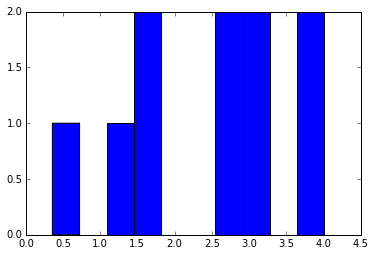

In [61]:
a=hist(trace)